In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical


In [4]:
iris = load_iris(as_frame=True)
df = iris.data.copy()
df['species_n'] = [iris.target_names[label] for label in iris.target]
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_n
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_n          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


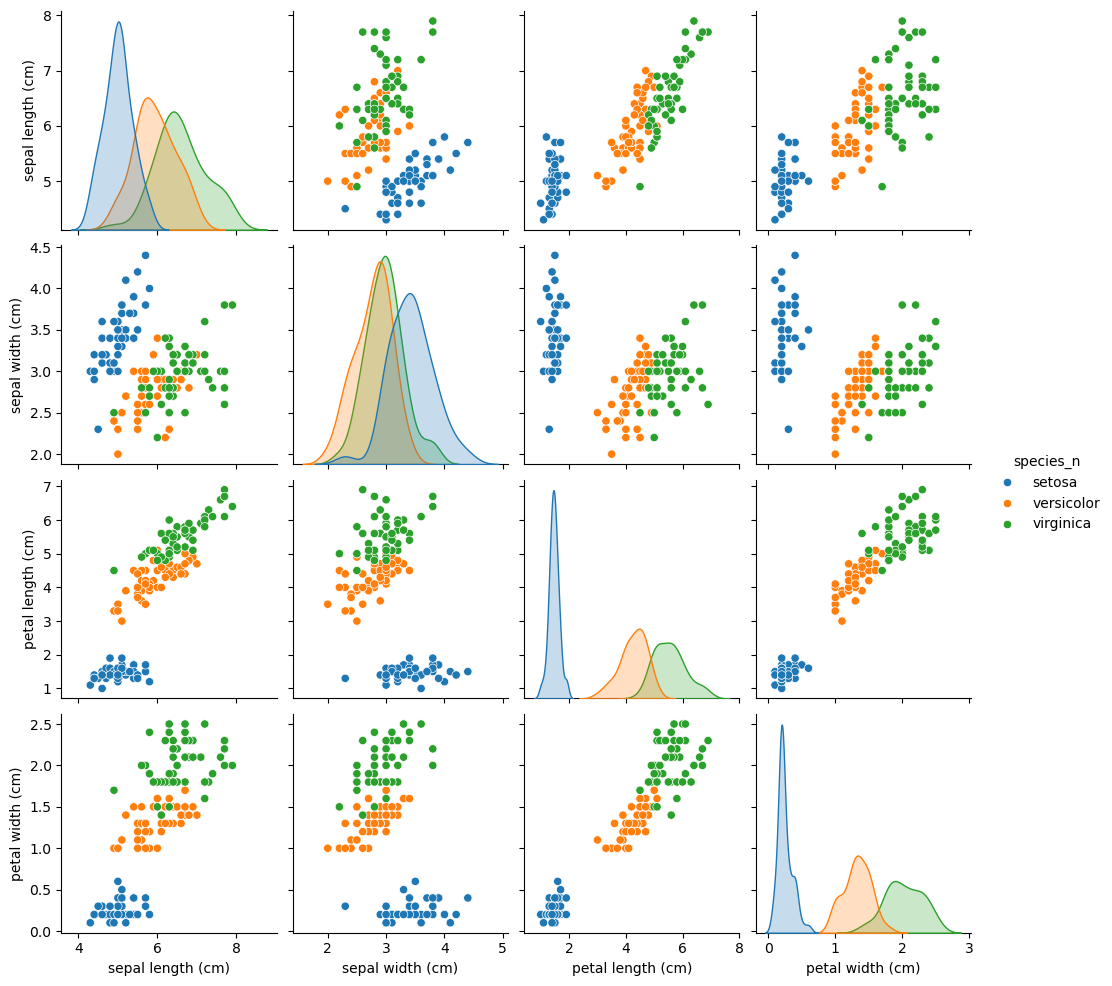

In [7]:
sns.pairplot(df, hue='species_n')

<Axes: xlabel='species_n', ylabel='count'>

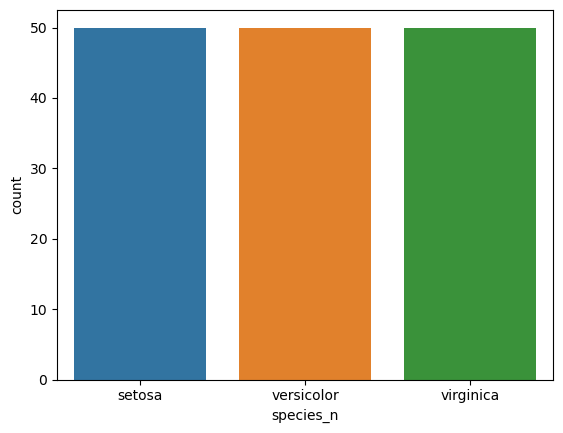

In [8]:
sns.countplot(x=df.species_n, hue=df.species_n)

In [9]:
# Splitting the data
X = iris.data
Y = iris.target
X_train, X_tv, y_train, y_tv = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_valid, X_test, y_valid, y_test = train_test_split(X_tv, y_tv, test_size=0.5, random_state=42)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [13]:
X_train.shape

(120, 4)

e:\Users\mazen\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


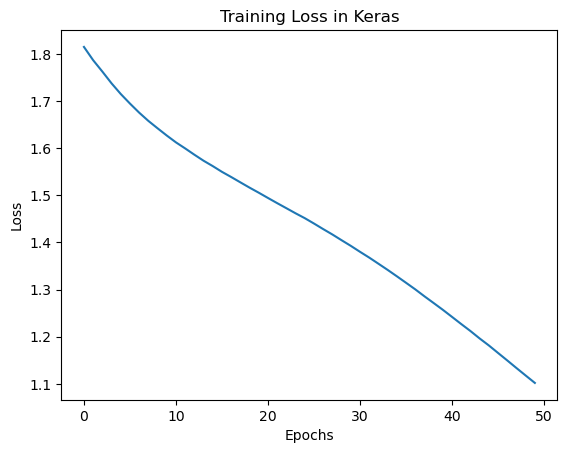

In [20]:

num_classes = 5  # Make sure this matches your output layer neurons
y_train = to_categorical(y_train, num_classes=num_classes)

# Define a 4-layer NN
model = keras.Sequential([
    layers.Dense(5, activation='relu', input_shape=(4,)),  # Input layer (10 features)
    layers.Dense(5, activation='relu'),  # Hidden layer 1
    layers.Dense(5, activation='relu'),  # Hidden layer 2
    layers.Dense(5, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Plot loss curve
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss in Keras")
plt.show()


In [22]:

num_classes = 5  # Match the output layer size
y_valid = to_categorical(y_valid, num_classes=num_classes)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_valid, y_valid)

# Print results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.8000 - loss: 0.9368
Test Loss: 0.9368
Test Accuracy: 0.8000
